In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
uci_rep_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_rep_path)

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [7]:
print(df['Channel'].unique())

[2 1]


In [8]:
x = df
x.head()
#y

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
print(x.shape)
print(x)

(440, 8)
[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


### K-means Cluster

In [10]:
from sklearn import cluster

In [11]:
k_means = cluster.KMeans(init='k-means++',n_clusters=5,n_init=10) # 알고리즘 활용
k_means.fit(x) # 학습

KMeans(n_clusters=5)

In [15]:
print(k_means.labels_)

[4 4 4 0 4 4 4 4 0 4 4 4 4 4 4 0 4 0 4 0 4 0 0 1 4 4 0 0 4 0 0 0 0 0 0 4 0
 4 4 0 0 0 4 4 4 4 4 2 4 4 0 0 4 4 0 0 2 4 0 0 4 2 4 4 0 2 0 4 0 0 0 1 0 4
 4 0 0 4 0 0 0 4 4 0 4 2 2 1 0 0 0 0 2 1 4 0 4 0 0 0 4 4 4 0 0 0 4 4 4 4 0
 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0
 0 0 0 0 0 0 0 4 4 0 4 4 4 0 0 4 4 4 4 0 0 0 4 4 0 4 0 4 0 0 0 0 0 1 0 1 0
 0 0 0 4 4 0 0 0 4 0 0 3 4 3 3 4 4 3 3 3 4 3 3 3 4 3 2 3 3 4 3 4 3 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 4 3 4 3 3 3 3 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 4 3 4
 3 4 4 3 4 4 4 4 4 4 4 3 3 4 3 3 4 3 3 4 3 3 3 4 3 3 3 3 3 1 3 3 3 3 3 4 3
 2 3 4 3 3 3 3 4 4 0 4 0 0 4 4 0 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 4 0 0 0 0
 4 0 0 4 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0
 4 4 0 0 0 0 0 0 4 4 0 4 0 0 4 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]


In [16]:
df['Cluster'] = k_means.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,4
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,4


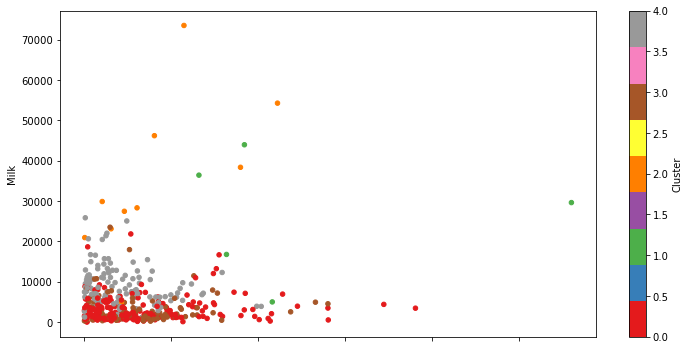

In [22]:
df.plot(kind='scatter',x='Fresh',y='Milk',c='Cluster',figsize=(12,6),cmap='Set1')
plt.show()

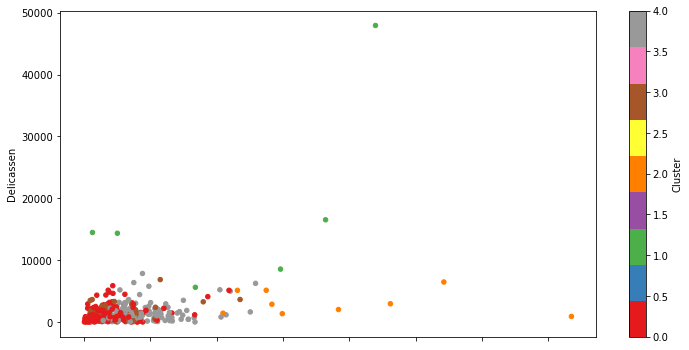

In [24]:
df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',figsize=(12,6),cmap='Set1')
plt.show()

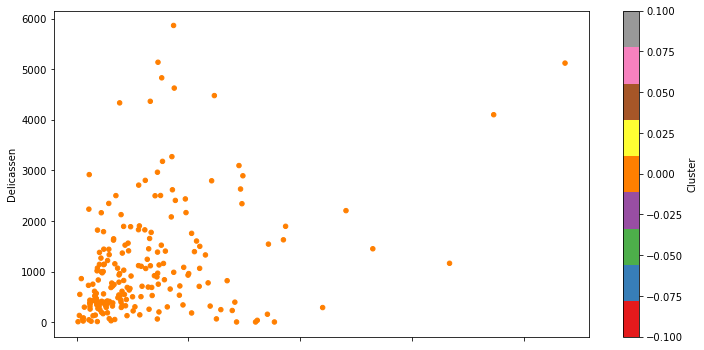

In [27]:
check = (df['Cluster'] == 0)
new_df0 = df[check]
new_df0.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',figsize=(12,6))
plt.show()

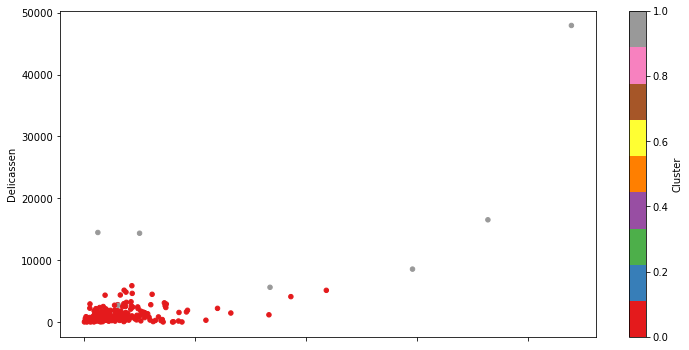

In [26]:
new_df.plot(kind='scatter',x='Milk',y='Delicassen',c='Cluster',cmap='Set1',figsize=(12,6))
plt.show()

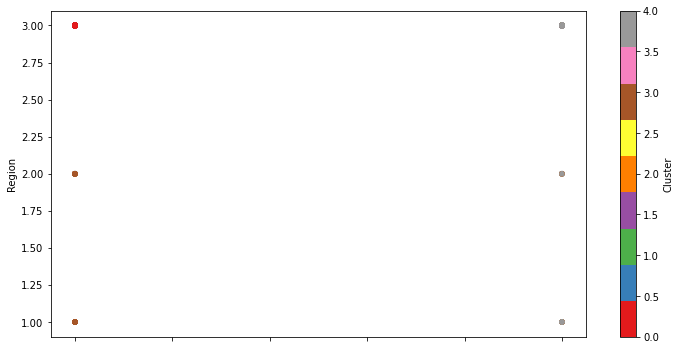

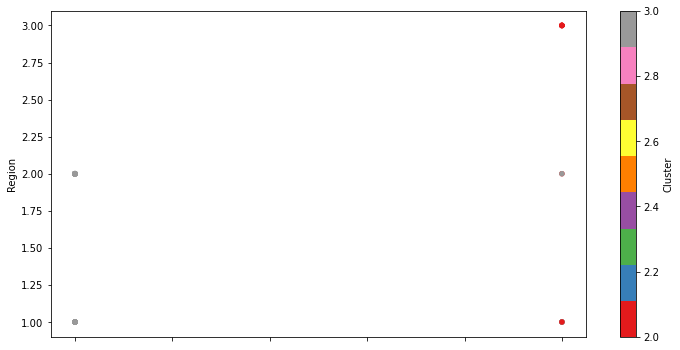

In [29]:
df.plot(kind='scatter',x='Channel',y='Region',c='Cluster',cmap='Set1',figsize=(12,6))
check = (df['Cluster'] == 2) | (df['Cluster'] == 3)
new_df = df[check]
new_df.plot(kind='scatter',x='Channel',y='Region',c='Cluster',cmap='Set1',figsize=(12,6))
plt.show()